# Motivation

In [1]:
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()

descr = housing_data['DESCR']
feature_names = housing_data['feature_names']
data = housing_data['data']
target = housing_data['target']

In [2]:
print(descr)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

# Data Preprocessing

In [3]:
import pandas as pd

df1 = pd.DataFrame(data=data)
df1.rename(columns={0: feature_names[0], 1: feature_names[1], 2: feature_names[2], 3: feature_names[3],
                  4: feature_names[4], 5: feature_names[5], 6: feature_names[6], 7: feature_names[7]}, inplace=True)
df2 = pd.DataFrame(data=target)
df2.rename(columns={0: 'HouseValue'}, inplace=True)
df = pd.concat([df1, df2], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   HouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


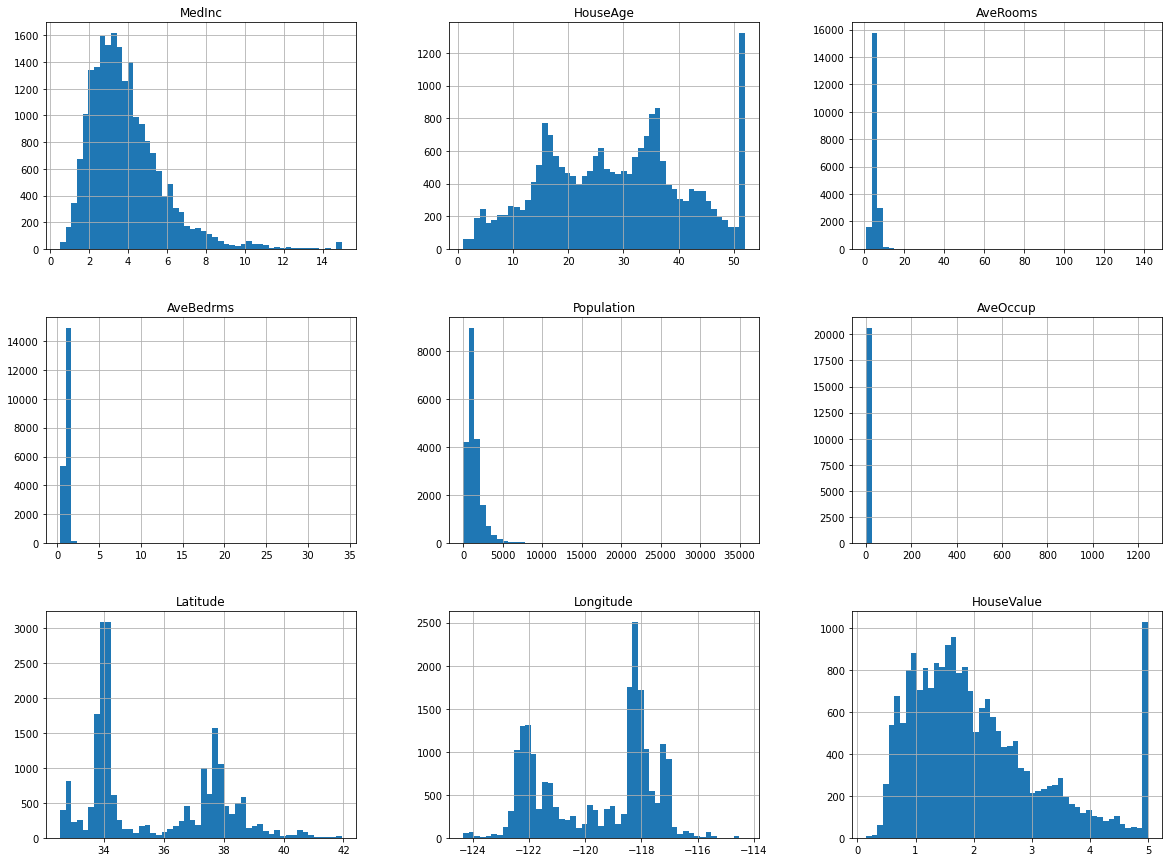

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

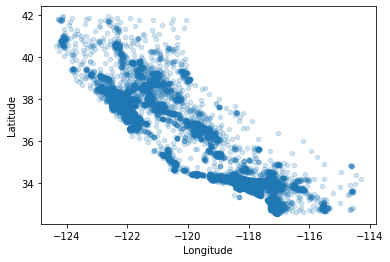

In [7]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.2)
plt.savefig('map1.png')

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

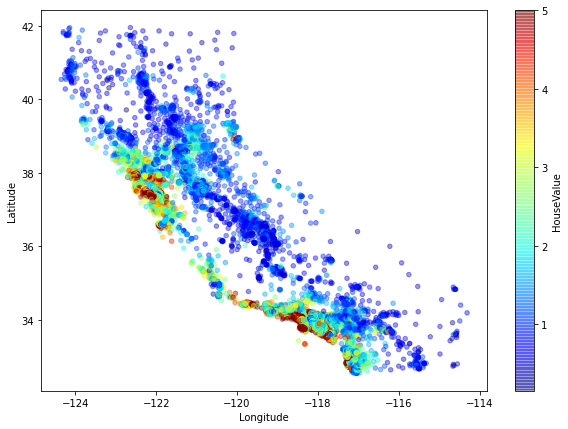

In [8]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4, figsize=(10,7),
    c="HouseValue", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

In [9]:
corr_matrix = df.corr()
corr_matrix["HouseValue"].sort_values(ascending=False)

HouseValue    1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: HouseValue, dtype: float64

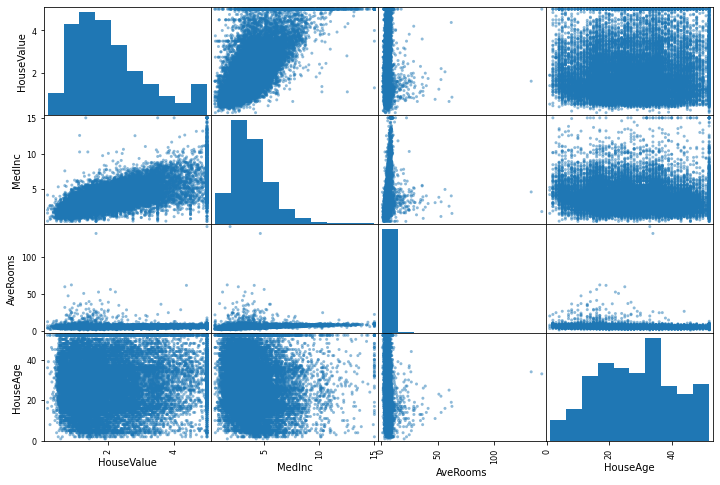

In [10]:
from pandas.plotting import scatter_matrix
attributes = ["HouseValue", "MedInc", "AveRooms", "HouseAge"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

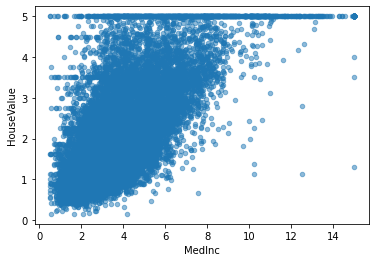

In [11]:
df.plot(kind="scatter", x="MedInc", y="HouseValue", alpha=0.5)
plt.savefig('scatter.png')

In [12]:
len(df['Population'].value_counts())

3888

In [13]:
inco = df.groupby('Population').mean()['MedInc']
mean = df.groupby('Population').mean()['HouseValue']
cluster = pd.concat([inco, mean], axis=1)

cluster.columns = ['inco', 'HouseValue']
cluster.describe()

,inco,HouseValue
count,3888.000000,3888.000000
mean,3.851736,2.027955
std,1.186246,0.660804
min,0.517950,0.225000
25%,3.151189,1.604383
50%,3.728921,1.975375
75%,4.380138,2.363625
max,12.729600,5.000010


In [14]:
cluster1 = cluster[cluster.HouseValue < 1.975]
cluster1.index

Float64Index([    6.0,     8.0,     9.0,    14.0,    18.0,    21.0,    23.0,
                 27.0,    28.0,    29.0,
              ...
              10475.0, 10493.0, 11139.0, 11272.0, 11973.0, 12153.0, 12427.0,
              16305.0, 28566.0, 35682.0],
             dtype='float64', name='Population', length=1942)

In [15]:
cluster_temp = cluster[cluster.HouseValue >= 1.975]
cluster2 = cluster_temp[cluster_temp.inco < 3.728921]
cluster2.index

Float64Index([   3.0,    5.0,   15.0,   20.0,   22.0,   24.0,   26.0,   31.0,
                34.0,   39.0,
              ...
              6330.0, 6664.0, 7111.0, 7180.0, 7282.0, 7443.0, 7450.0, 7604.0,
              7984.0, 8793.0],
             dtype='float64', name='Population', length=513)

In [16]:
cluster3 = cluster_temp[cluster_temp.inco >= 3.728921]
cluster3.index

Float64Index([   11.0,    13.0,    17.0,    19.0,    25.0,    30.0,    40.0,
                 41.0,    45.0,    49.0,
              ...
              10877.0, 10988.0, 11935.0, 11956.0, 12203.0, 12873.0, 13251.0,
              15037.0, 15507.0, 16122.0],
             dtype='float64', name='Population', length=1433)

In [17]:
def get_group(x):
    if x in cluster1.index:
        return 'low_value'
    elif x in cluster2.index:
        return 'high_value_low_income'
    else:
        return 'high_value_high_income'
df['group'] = df.Population.apply(get_group)

In [18]:
df.drop(['Latitude', 'Longitude', 'Population'], axis=1, inplace=True)
df = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'group', 'HouseValue']]
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,group,HouseValue
0,8.3252,41.0,6.984127,1.023810,2.555556,high_value_high_income,4.526
1,8.3014,21.0,6.238137,0.971880,2.109842,high_value_high_income,3.585
2,7.2574,52.0,8.288136,1.073446,2.802260,low_value,3.521
3,5.6431,52.0,5.817352,1.073059,2.547945,high_value_low_income,3.413
4,3.8462,52.0,6.281853,1.081081,2.181467,high_value_high_income,3.422


In [19]:
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup','group']]
Y = df['HouseValue']

n = pd.get_dummies(df.group)
X = pd.concat([X, n], axis=1)

drops = ['group']
X.drop(drops, inplace=True, axis=1)

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,high_value_high_income,high_value_low_income,low_value
0,8.3252,41.0,6.984127,1.023810,2.555556,1,0,0
1,8.3014,21.0,6.238137,0.971880,2.109842,1,0,0
2,7.2574,52.0,8.288136,1.073446,2.802260,0,0,1
3,5.6431,52.0,5.817352,1.073059,2.547945,0,1,0
4,3.8462,52.0,6.281853,1.081081,2.181467,1,0,0


# Train and Build a Linear Regression Model

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared: %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared: 0.5546


In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 0.7704


In [23]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)

Linear Regression MAE: 0.5645


# Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
print('Random Forest R squared: %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared: 0.6777


In [26]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 0.6554


# Gradient Boosting

In [27]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [28]:
print('Gradient Boosting R squared: %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared: 0.6850


In [29]:
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 0.6479


# Feature Importance

In [30]:
feature_labels = np.array(X_test.columns)
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

high_value_high_income-0.00%
high_value_low_income-0.44%
AveBedrms-1.43%
low_value-2.90%
AveRooms-4.48%
HouseAge-5.50%
AveOccup-14.88%
MedInc-70.36%
